### Load Data

In [155]:
import pandas as pd
import numpy as np

path = r"C:\Users\2022\Desktop\Projects\fruit price prediction\Vegetable and Fruits Prices  in India.xlsx"
df = pd.read_excel(path)

### Show Data

In [9]:
df.head()

,datesk,Item Name,Date,price
0,20110101,Kashini greens,2011-01-01 00:00:00,NaN
1,20110101,Pineapple juice,2011-01-01 00:00:00,NaN
2,20110101,Thiland Juice,2011-01-01 00:00:00,NaN
3,20110101,Thiland Jelly,2011-01-01 00:00:00,NaN
4,20110101,Orange juice,2011-01-01 00:00:00,NaN


In [10]:
df.shape

(868965, 4)

In [11]:
df.isnull().sum()

datesk            0
Item Name      7839
Date              0
price        317017
dtype: int64

In [30]:
name_v_and_f = df['Item Name'].unique()
len(name_v_and_f)

331

### Pre-Processing

In [24]:
df2 = df.dropna().copy()

In [26]:
df2.head()

,datesk,Item Name,Date,price
296,20110101,Sponge Gourd,2011-01-01 00:00:00,32.0
22311,20110309,Berry Southafrica,2011-09-03 00:00:00,0.0
22312,20110309,Baby corn cleaned,2011-09-03 00:00:00,56.0
22313,20110309,Baby corn,2011-09-03 00:00:00,14.0
22314,20110309,Chillies Bajji yagani,2011-09-03 00:00:00,0.0


In [27]:
df2.shape

(551948, 4)

In [28]:
df2.isnull().sum()

datesk       0
Item Name    0
Date         0
price        0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df2["Item_Name"] = encoder.fit_transform(df2["Item Name"])
df2.head()

,datesk,Item Name,Date,price,Item_Name
296,20110101,Sponge Gourd,2011-01-01 00:00:00,32.0,294
22311,20110309,Berry Southafrica,2011-09-03 00:00:00,0.0,45
22312,20110309,Baby corn cleaned,2011-09-03 00:00:00,56.0,21
22313,20110309,Baby corn,2011-09-03 00:00:00,14.0,20
22314,20110309,Chillies Bajji yagani,2011-09-03 00:00:00,0.0,88


### Feature Engineering

In [87]:
def get_count(df,col):
    max_label = df[col].describe()['max']
    count_list = []
    for i in range(int(max_label)+1):
        _ = sum(df[df[col]==i][col])
        count_list.append((i,_))
    return count_list

In [88]:
count_list = get_count(df2,'Item_Name')
count_dict = {i : k for i,k in count_list}
count_sum = 0
for i in count_list:
    count_sum +=i[1]

In [89]:
count_sum

87840719

In [93]:
def p_item(count_sum,count_dict):
    def p_item_2(label):
        #print(label)
        _ = count_dict[label] /count_sum 
        return _ * 100
    return p_item_2

In [95]:
df2['Percent'] = df2['Item_Name'].apply(p_item(count_sum,count_dict))

In [97]:
df2.head()

,datesk,Item Name,Date,price,Item_Name,Percent
296,20110101,Sponge Gourd,2011-01-01 00:00:00,32.0,294,0.673744
22311,20110309,Berry Southafrica,2011-09-03 00:00:00,0.0,45,0.104917
22312,20110309,Baby corn cleaned,2011-09-03 00:00:00,56.0,21,0.048937
22313,20110309,Baby corn,2011-09-03 00:00:00,14.0,20,0.046607
22314,20110309,Chillies Bajji yagani,2011-09-03 00:00:00,0.0,88,0.205171


In [135]:
def Time2Feature(df,col):
    Time = df[col].to_list()
    years = []
    months = []
    days = []
    Time_Format = ' Y M D '
    
    for t in Time:
        t = str(t)
        year = ''
        month = ''
        day = ''
        for i in range(8):
            if 0<=i<4:
                year += str(t[i])
            elif 4<=i<6:
                month += str(t[i])
            elif 6<=i<8:
                day += str(t[i])
        
        years.append(int(year))
        months.append(int(month))
        days.append(int(day))
    return years , months , days

In [136]:
df2['year'] , df2['month'] , df2['day'] = Time2Feature(df2,'datesk')

In [137]:
df2.head(335*2)

,datesk,Item Name,Date,price,Item_Name,Percent,year,month,day
296,20110101,Sponge Gourd,2011-01-01 00:00:00,32.0,294,0.673744,2011,1,1
22311,20110309,Berry Southafrica,2011-09-03 00:00:00,0.0,45,0.104917,2011,3,9
22312,20110309,Baby corn cleaned,2011-09-03 00:00:00,56.0,21,0.048937,2011,3,9
22313,20110309,Baby corn,2011-09-03 00:00:00,14.0,20,0.046607,2011,3,9
22314,20110309,Chillies Bajji yagani,2011-09-03 00:00:00,0.0,88,0.205171,2011,3,9
...,...,...,...,...,...,...,...,...,...
23984,20110314,Washington gala apple,14/03/2011,0.0,322,0.721048,2011,3,14
23985,20110314,Chilles small cleaned (C.B.P),14/03/2011,41.0,86,0.200508,2011,3,14
23990,20110314,Mosambi polo,14/03/2011,0.0,221,0.494881,2011,3,14
23991,20110314,S.mellon namdhari (Red),14/03/2011,0.0,286,0.640434,2011,3,14


In [143]:
df2.describe()

,datesk,price,Item_Name,Percent,year,month,day
count,5.519480e+05,551948.000000,551948.000000,551948.000000,551948.000000,551948.000000,551948.000000
mean,2.014232e+07,51.664567,159.146729,0.363168,2014.165305,6.533820,15.708088
std,2.003442e+04,68.496674,96.771562,0.222502,2.008383,3.458837,8.766699
min,2.011010e+07,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000
25%,2.012122e+07,0.000000,72.000000,0.165536,2012.000000,4.000000,8.000000
50%,2.014083e+07,30.000000,156.000000,0.352055,2014.000000,7.000000,16.000000
75%,2.016050e+07,67.000000,242.000000,0.543238,2016.000000,10.000000,23.000000
max,2.018023e+07,863.000000,329.000000,0.764730,2018.000000,12.000000,31.000000


In [154]:
df2.to_csv('Pre-Processed-data.csv')

### data visualization

In [159]:
_ = count_list[328]
print(f'Label : {_[0]} count : {_[1]} ')

Label : 328 count : 671744 


In [163]:
encoder.classes_[328]

'knol-khol'

In [161]:
df_328 = df2[df2['Item_Name'] == 328 ]
df_328.head()

,datesk,Item Name,Date,price,Item_Name,Percent,year,month,day
22321,20110309,knol-khol,2011-09-03 00:00:00,17.0,328,0.76473,2011,3,9
22865,20110310,knol-khol,2011-10-03 00:00:00,17.0,328,0.76473,2011,3,10
24197,20110314,knol-khol,14/03/2011,17.0,328,0.76473,2011,3,14
24878,20110316,knol-khol,16/03/2011,17.0,328,0.76473,2011,3,16
25203,20110317,knol-khol,17/03/2011,17.0,328,0.76473,2011,3,17


In [162]:
df_328.shape

(2048, 9)

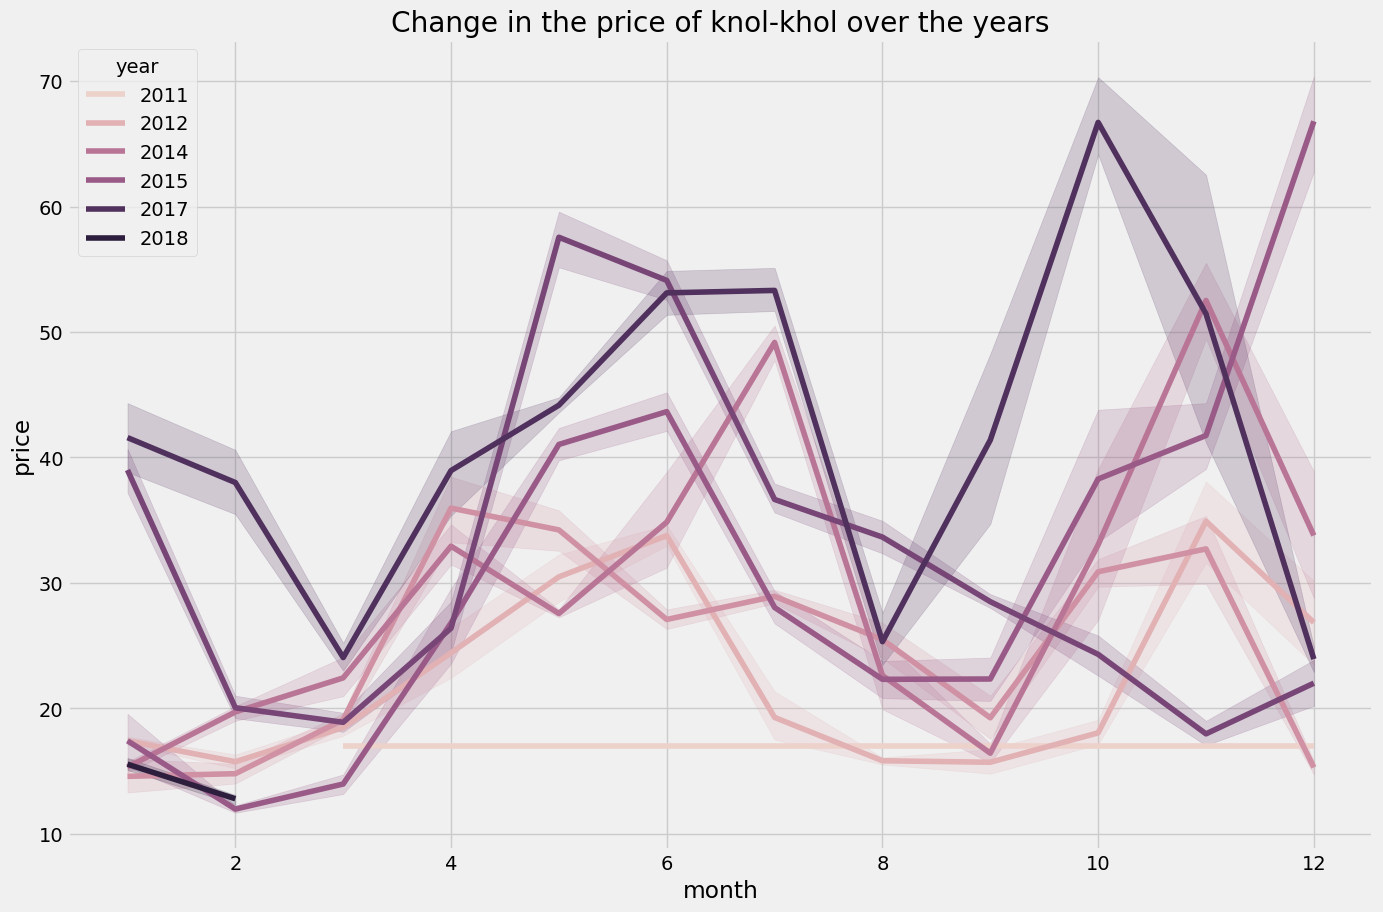

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Change in the price of knol-khol over the years")
sns.lineplot(data = df_328, x='month', y='price', hue='year',)
plt.show()

### Save Encoder

In [193]:
import joblib

file_path = 'encoder.pkl'
joblib.dump(encoder, file_path)

['encoder.pkl']

### Load Encoder

In [194]:
import joblib

file_path = 'encoder.pkl'

loaded_encoder = joblib.load(file_path)

In [196]:
loaded_encoder.classes_[328]

'knol-khol'